In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
csv_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
tips =  pd.read_csv(csv_url)

In [5]:
print("The first few rows in the dataset: \n\n", tips.head(3)) 
print('\n The final few rows in the dataset \n', tips.tail(3))


The first few rows in the dataset: 

    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

 The final few rows in the dataset 
      total_bill   tip     sex smoker   day    time  size
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


In [6]:
print("The dtypes in the dataframe are:", end='\n\n')
print(tips.dtypes)

The dtypes in the dataframe are:

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [9]:
tips['sex']=tips['sex'].astype('category') 
tips['smoker']=tips['smoker'].astype('category') 
tips['day']=tips['day'].astype('category') 
tips['time']=tips['time'].astype('category') 
print(*tips.dtypes)

float64 float64 category category category category int64


In [10]:
print(*tips.isna().any())

False False False False False False False


In [12]:
tips.sort_values(by='tip').head()
tips.sort_values(by='total_bill', ascending = False).head(3)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


In [13]:
print("Table of characteristics of the categorical variables in the Tips dataset:\n")
tips.describe(include=['category'])

Table of characteristics of the categorical variables in the Tips dataset:



,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [14]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
print("The mean bill amount is $%.3f" %tips['total_bill'].mean(),"while the median bill amount is $%.3f" %tips['total_bill'].quantile(q=0.5))
print("The mean tip amount is $%.3f" %tips['tip'].mean(),"while the median tip is $%.3f" %tips['tip'].quantile(q=0.5))

The mean bill amount is $19.786 while the median bill amount is $17.795
The mean tip amount is $2.998 while the median tip is $2.900


In [17]:
print(f"The variance and standard deviations of Total Bill amounts are {tips['total_bill'].var():.3f} and {tips['total_bill'].std():.3f}")
print(f"The variance and standard deviations of tip amounts are {tips['tip'].var():.3f} and {tips['tip'].std():.3f}")
print(f"The variance and standard deviations of size are {tips['size'].var():.3f} and {tips['size'].std():.3f}")

The variance and standard deviations of Total Bill amounts are 79.253 and 8.902
The variance and standard deviations of tip amounts are 1.914 and 1.384
The variance and standard deviations of size are 0.905 and 0.951


In [18]:
tips.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


Text(0.5, 1.0, 'Tables served by Day and by party size')

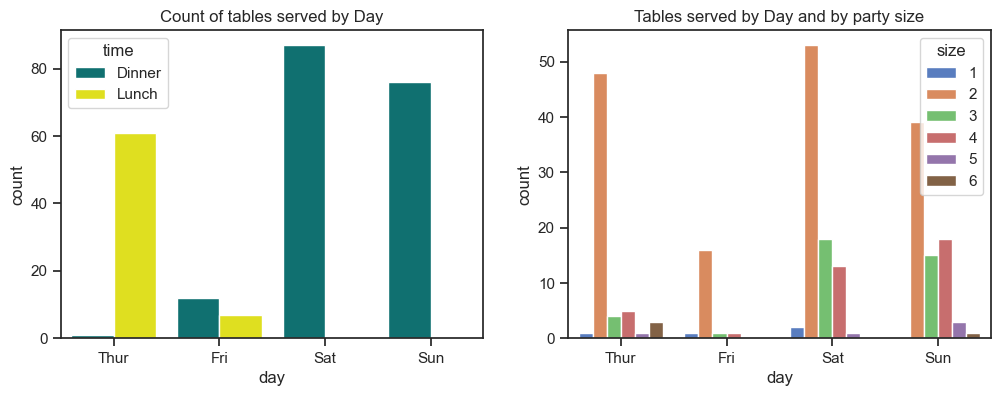

In [21]:
day_order=["Thur", "Fri", "Sat","Sun"] 
sns.set(style="ticks", palette="muted")
f, axes = plt.subplots(1,2, figsize=(12,4))
day_order=["Thur", "Fri", "Sat","Sun"]
sns.countplot(x ="day",data =tips, hue="time", palette=["teal","yellow"], order=day_order, ax=axes[0])
axes[0].set_title("Count of tables served by Day")

# plot number of  tables per day by size of party
sns.countplot(x =("day"), hue="size",data =tips, ax=axes[1], order=day_order)
axes[1].set_title("Tables served by Day and by party size")